<AxesSubplot: >

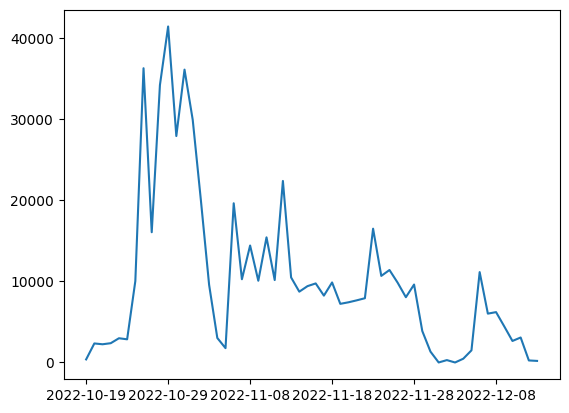

In [2]:
#CREAZIONE DI UN ISTOGRAMMA CHE RAPPRESENTA IL NUMERO DI TWEET PER GIORNO
import pandas as pd

# Plot a line histogram of the number of tweets per day
ttdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\tt.csv", dtype = {'created_at':'str'}, low_memory=False )

ttdf['created_at'].str[:-9].value_counts().sort_index().plot(kind='line')

Positive words


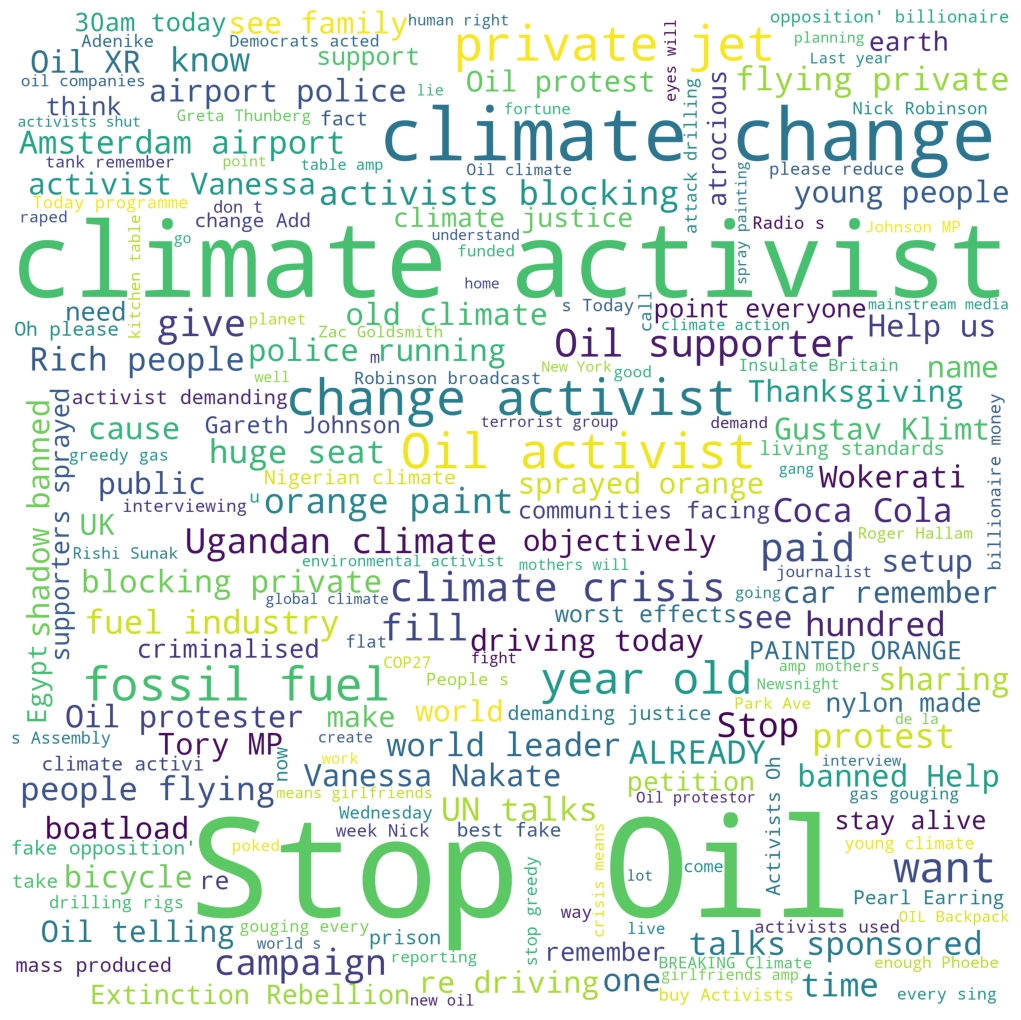

Negative words


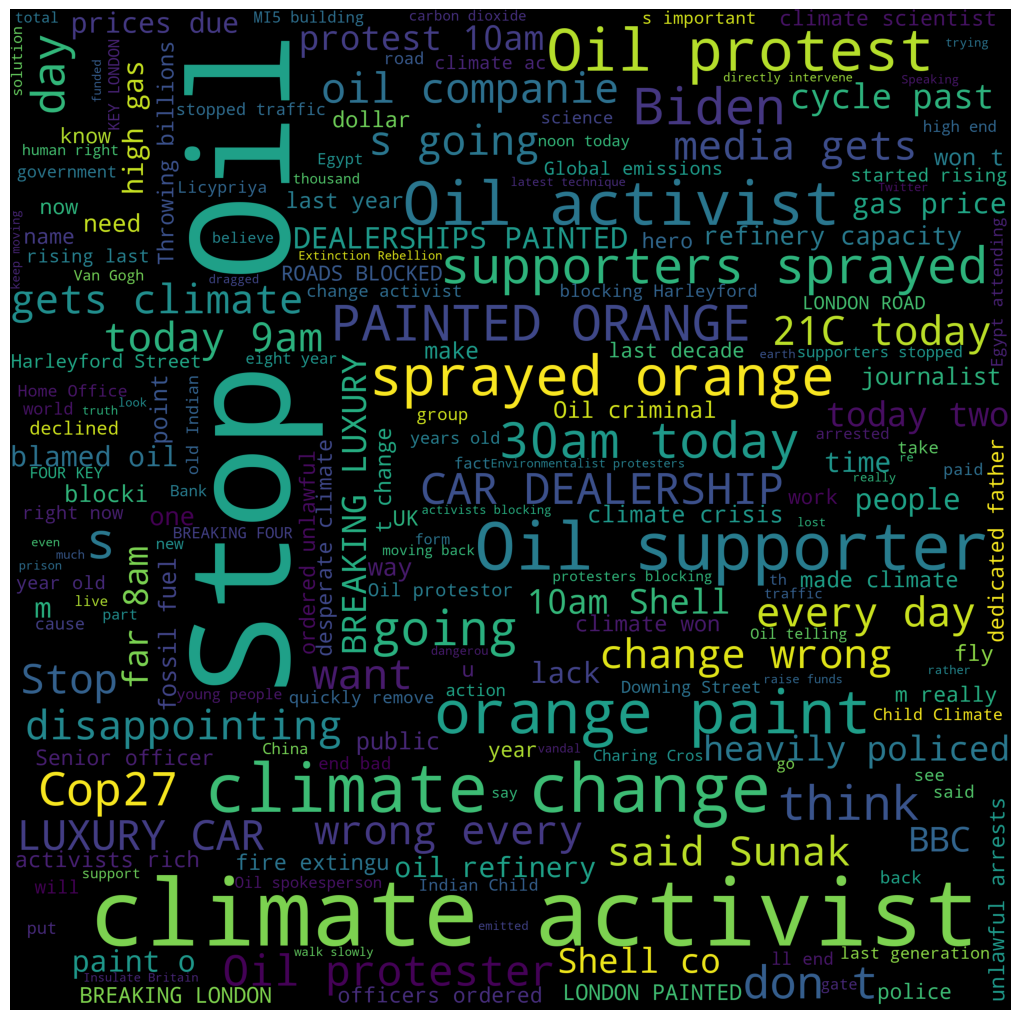

In [3]:
#CREAZIONE DI WORDCLOUD PER I TWEET POSITIVI E NEGATIVI
import sklearn
from sklearn.model_selection import train_test_split
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#WORDCLOUD
ttoadf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttoa.csv")

data = ttoadf[['tweet_text','Sentiment']]

#split del dataset in trai e test
train,test = train_test_split(data, test_size = 0.1)

#rimozione sentimenti neutrali
train = train[train.Sentiment != "neutral"]

train_pos = train[ train['Sentiment'] == 'positive']
train_pos_text = train_pos['tweet_text']

train_neg = train[ train['Sentiment'] == 'negative']
train_neg_text = train_neg['tweet_text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                      if 'http' not in word
                      and not word.startswith('@')
                      and not word.startswith('#')
                      and word != 'RT'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color = color,
                          width=2500,
                          height=2500).generate(cleaned_word)
    plt.figure(1, figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos_text, 'white')
print("Negative words")
wordcloud_draw(train_neg_text, 'black')